# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('House_price_cleaned.csv')

In [4]:
df.shape

(3868, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3868 entries, 0 to 3867
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Superficie          3868 non-null   object
 1   Rooms               3868 non-null   object
 2   Bedrooms            3868 non-null   int64 
 3   Price               3868 non-null   object
 4   Location            3868 non-null   object
 5   description         3868 non-null   object
 6   Loc_Paris           3868 non-null   int64 
 7   m2                  3868 non-null   int64 
 8   nb_rooms            3868 non-null   int64 
 9   nb_bedrooms         3868 non-null   int64 
 10  building_floor      3868 non-null   int64 
 11  apartment_floor     3868 non-null   int64 
 12  nb_bath             3868 non-null   int64 
 13  Cellar              3868 non-null   int64 
 14  balc_patio          3868 non-null   object
 15  Heating             3868 non-null   object
 16  Renovated           3868

### I need to find out what are the different features that will be usefull to work with.
    - I transormed the feature 'Superficie' into the feature 'm2'. Thus, I will drop the feature 'Superficie'.
    - I also transformed the features 'Rooms' and 'Bedrooms' to two others features. Thus, I will drop them.
    - Same for the columns 'Price', 'Location', 'description'.

In [6]:
df1=df.drop(['Superficie','Rooms','Bedrooms','Price','Location', 'description','Loc_Paris'],axis=1)

In [7]:
df1.describe()

,m2,nb_rooms,nb_bedrooms,building_floor,apartment_floor,nb_bath,Cellar,Renovated,Parking,SalePrice,Ground_floor,Heating_Central,Heating_Individual,Last_floor
count,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3.868000e+03,3868.000000,3868.000000,3868.000000,3868.000000
mean,75.158480,3.080403,1.728283,5.165719,3.178645,0.628749,0.527404,0.072130,0.106774,1.008926e+06,0.140383,0.199069,0.222854,0.119700
std,57.662483,1.763785,1.282597,4.046688,2.979091,0.729674,0.499313,0.258737,0.308865,1.034532e+06,0.347428,0.399352,0.416215,0.324652
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+04,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.285000e+05,0.000000,0.000000,0.000000,0.000000
50%,60.000000,3.000000,2.000000,6.000000,3.000000,1.000000,1.000000,0.000000,0.000000,7.000000e+05,0.000000,0.000000,0.000000,0.000000
75%,95.000000,4.000000,3.000000,6.000000,5.000000,1.000000,1.000000,0.000000,0.000000,1.250000e+06,0.000000,0.000000,0.000000,0.000000
max,855.000000,30.000000,12.000000,33.000000,32.000000,10.000000,1.000000,1.000000,1.000000,1.970000e+07,1.000000,1.000000,1.000000,1.000000


Outliers detected. We will explore them later in the EDA.

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3868 entries, 0 to 3867
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   m2                  3868 non-null   int64 
 1   nb_rooms            3868 non-null   int64 
 2   nb_bedrooms         3868 non-null   int64 
 3   building_floor      3868 non-null   int64 
 4   apartment_floor     3868 non-null   int64 
 5   nb_bath             3868 non-null   int64 
 6   Cellar              3868 non-null   int64 
 7   balc_patio          3868 non-null   object
 8   Heating             3868 non-null   object
 9   Renovated           3868 non-null   int64 
 10  Parking             3868 non-null   int64 
 11  SalePrice           3868 non-null   int64 
 12  building_height     3868 non-null   object
 13  Ground_floor        3868 non-null   int64 
 14  Heating_Central     3868 non-null   int64 
 15  Heating_Individual  3868 non-null   int64 
 16  Last_floor          3868

In [9]:
df1.columns

Index(['m2', 'nb_rooms', 'nb_bedrooms', 'building_floor', 'apartment_floor',
       'nb_bath', 'Cellar', 'balc_patio', 'Heating', 'Renovated', 'Parking',
       'SalePrice', 'building_height', 'Ground_floor', 'Heating_Central',
       'Heating_Individual', 'Last_floor', 'district'],
      dtype='object')

In [10]:
#numerical variables
num=['m2','SalePrice_K']

#categorical variables
cat=['nb_rooms', 'nb_bedrooms', 'building_floor', 'apartment_floor',
       'nb_bath', 'Cellar', 'balc_patio', 'Heating', 'Renovated', 'Parking', 'building_height', 'Heating_Central', 'Heating_Individual',
       'Last_floor', 'district']

# Exploratory Data Analysis

Before diving into the Exploratory Data Analysis, I like to make some assumptions. I need to find out what variables are important when we predict the price of an apartment in Paris and what are there effects on the Price. These are my assumptions: 

    - Obviously, the higher the area of a home, the higher the price of the apartment.
    - The higher the number of rooms,bedrooms,bathrooms, the higher the price of the apartment. The number of rooms/bedrooms/bathrooms must be correlated with the area.
    - The height of the building might be negatively correlated with the price.
    - The presence of a Parking, a Cellar or a balcony must increase the price.
    - I have not any assumptions regarding the type of Heating.
    - In Paris some districts are way more expensive than others.
    - I think that an apartment at the Last floor is more expensive. At the contrary, an apartment at the ground floor must be less expensive. An apartment that have been renovated recently must be more expensive too.
    
During this EDA I will try to find out if they are valid or not.




# Analysing 'SalePrice'

### Univariate analysis

In [11]:
#I will put the column SalePrice in K Euros. 
df1['SalePrice_K']=df.SalePrice.apply(lambda x: x/1000)

In [12]:
df1.SalePrice_K.describe()

count     3868.000000
mean      1008.926400
std       1034.531775
min         50.000000
25%        428.500000
50%        700.000000
75%       1250.000000
max      19700.000000
Name: SalePrice_K, dtype: float64

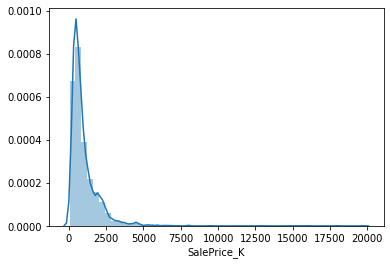

In [13]:
sns.distplot(df1.SalePrice_K)

The SalePrice feature is not normally distributed and it has a positive skewness.

In [14]:
print(f"Skewness: {df1['SalePrice_K'].skew()}")
print(f"Kurtosis: {df1['SalePrice_K'].kurt()}")

Skewness: 5.589139420186153
Kurtosis: 67.48395764664971


We will need to normalize in order to use some regression techniques. I think about the log transformation, but let's see later.

# Exploring the relationship between SalePrice and the area feature

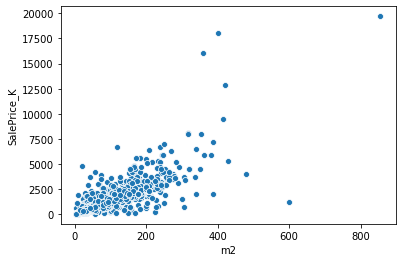

In [15]:
sns.scatterplot(x=df1.m2,y=df1.SalePrice_K,data=df1)

It seems that there is a linear relationship between the area feature and the SalePrice.

# Exploring the relationship between SalePrice and the variables that I find the most importants ie the number of bedrooms,rooms;bathrooms 

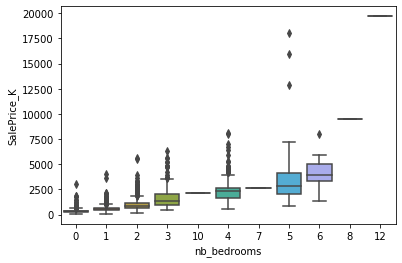

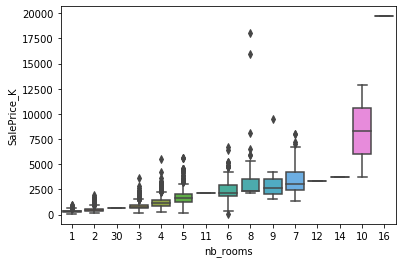

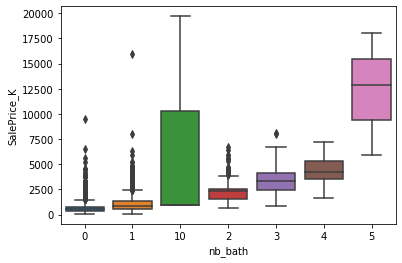

In [16]:
for i  in ['nb_bedrooms','nb_rooms','nb_bath']:
    sns.boxplot(x=df1[i],y=df1.SalePrice_K,data=df1,order=df1.groupby(i).SalePrice_K.median().sort_values().index)
    plt.show()

That's suspicious, let us check some rows of our dataframe, in order to find out what are the 7p bathrooms and 10p bathrooms.


In [17]:
df1[df1.nb_bath==10]

,m2,nb_rooms,nb_bedrooms,building_floor,apartment_floor,nb_bath,Cellar,balc_patio,Heating,Renovated,Parking,SalePrice,building_height,Ground_floor,Heating_Central,Heating_Individual,Last_floor,district,SalePrice_K
2855,80,4,2,6,4,10,1,0,"Individuel, au gaz",0,0,899000,Average,0,0,1,0,10e,899.0
3298,855,16,12,6,1,10,1,"Terrasse, balcon",Individuel,1,1,19700000,Average,0,0,1,0,16e,19700.0
3303,80,4,2,6,4,10,1,0,Individuel,0,0,899000,Average,0,0,1,0,10e,899.0


In [18]:
# Let's drop these rows since we can be sure that these kinds of apartments are not real.
df2=df1[~(df1.nb_bath==10)]

WAHOOOO some apartments have more than 10 rooms in Paris. Must be very rare. Let's look at it.

In [19]:
df2[df2.nb_rooms==30]

,m2,nb_rooms,nb_bedrooms,building_floor,apartment_floor,nb_bath,Cellar,balc_patio,Heating,Renovated,Parking,SalePrice,building_height,Ground_floor,Heating_Central,Heating_Individual,Last_floor,district,SalePrice_K
1705,49,30,2,6,0,1,0,0,Unknown,0,0,670000,Average,1,0,0,0,15e,670.0


In [20]:
# There is clearly a problem with this apartment. Let's drop it.
df3=df2[~(df2.nb_rooms==30)]

In [21]:
# let's look at the 10p. apartements.
df3[df3.nb_rooms==10]

,m2,nb_rooms,nb_bedrooms,building_floor,apartment_floor,nb_bath,Cellar,balc_patio,Heating,Renovated,Parking,SalePrice,building_height,Ground_floor,Heating_Central,Heating_Individual,Last_floor,district,SalePrice_K
644,42,10,6,0,1,0,0,0,Unknown,0,0,3750000,Average,0,0,0,0,16e,3750.0
3651,420,10,5,7,0,5,1,"Terrasse, balcon",Individuel,1,0,12900000,Average,1,0,1,0,16e,12900.0


In [22]:
#10 rooms for 42 m² ... not possible. Let's drop it.
df4=df3.drop(644,axis=0)

In [23]:
# let's look at the 11p. apartements.
df4[df4.nb_rooms==11]


,m2,nb_rooms,nb_bedrooms,building_floor,apartment_floor,nb_bath,Cellar,balc_patio,Heating,Renovated,Parking,SalePrice,building_height,Ground_floor,Heating_Central,Heating_Individual,Last_floor,district,SalePrice_K
1533,184,11,10,0,1,0,0,0,Unknown,0,1,2100000,Average,0,0,0,0,8e,2100.0


In [24]:
#Drop
df5=df4[~(df4.nb_rooms==11)]

In [25]:
# let's look at the 12p. apartements.
df5[df5.nb_rooms==12]

,m2,nb_rooms,nb_bedrooms,building_floor,apartment_floor,nb_bath,Cellar,balc_patio,Heating,Renovated,Parking,SalePrice,building_height,Ground_floor,Heating_Central,Heating_Individual,Last_floor,district,SalePrice_K
3474,225,12,4,4,0,3,0,0,Unknown,0,0,3350000,Average,1,0,0,0,2e,3350.0


In [26]:
#Drop
df6=df5[~(df5.nb_rooms==12)]

In [27]:
# let's look at the 14p. apartements.
df6[df6.nb_rooms==14]

,m2,nb_rooms,nb_bedrooms,building_floor,apartment_floor,nb_bath,Cellar,balc_patio,Heating,Renovated,Parking,SalePrice,building_height,Ground_floor,Heating_Central,Heating_Individual,Last_floor,district,SalePrice_K
3232,338,14,6,8,1,0,1,"Terrasse, balcon",Unknown,0,0,3680000,Average,0,0,0,0,16e,3680.0


In [28]:
#Drop
df7=df6[~(df6.nb_rooms==14)]

In [29]:
# Now let's look at the 7 bedrooms apartment.
df7[df7.nb_bedrooms==7]

,m2,nb_rooms,nb_bedrooms,building_floor,apartment_floor,nb_bath,Cellar,balc_patio,Heating,Renovated,Parking,SalePrice,building_height,Ground_floor,Heating_Central,Heating_Individual,Last_floor,district,SalePrice_K
443,175,8,7,5,0,0,1,0,Individuel,0,0,2650000,Average,1,0,1,0,7e,2650.0


In [30]:
#Drop it. Such an apartment can not exist.
df8=df7[~(df7.nb_bedrooms==7)]
df9=df8[~(df8.nb_bedrooms==8)]

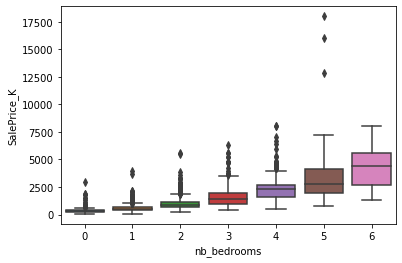

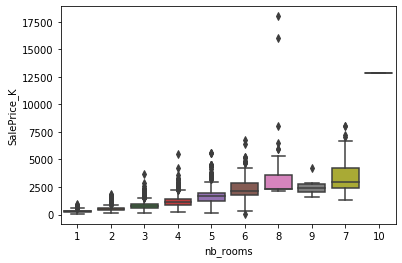

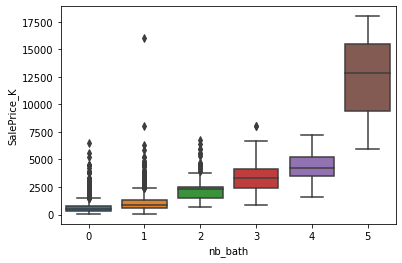

In [31]:
for i  in ['nb_bedrooms','nb_rooms','nb_bath']:
    sns.boxplot(x=df9[i],y=df9.SalePrice_K,data=df9,order=df9.groupby(i).SalePrice_K.median().sort_values().index)
    plt.show()

Except for the number of rooms everything seems normal. It validates my assumptions. The higher the number of rooms,bedrooms and bathrooms, the higher the price. For apartments with more than 6 rooms, the relationship seems more complicated. Indeed, it seems the average price is stable.

# Exploration of our numerical features

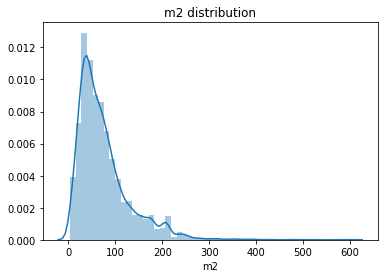

Skewness: 1.939223111202509
Kurtosis: 6.370315641308085


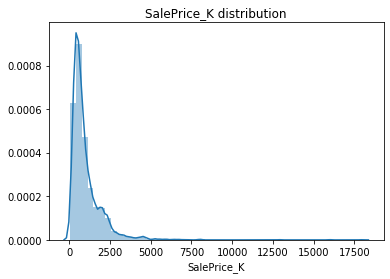

Skewness: 4.660109642684174
Kurtosis: 49.41176369742652


In [32]:
for i in num:
    sns.distplot(df9[i])
    plt.title(f'{i} distribution')
    plt.show()
    print(f"Skewness: {df9[i].skew()}")
    print(f"Kurtosis: {df9[i].kurt()}")

m2, SalePrice are not normally distributed. We will need to normalize to use some regression techniques. May be we can use the log transformation. we will deal with this at the end of our exploratory data analysis.




# Outliers Detection and Removal

### Let's first do a Bivariate analysis between the SalePrice and the area feature.

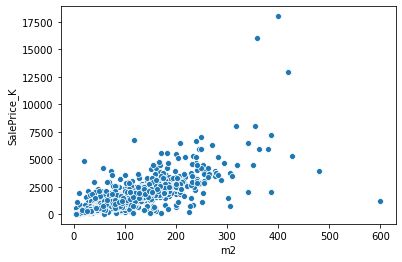

In [33]:
sns.scatterplot(x=df9.m2,y=df9.SalePrice_K,data=df9)

We have seen that there was a linear relationship between the Price and the area of a house. Here it seems that there are some outliers. Indeed the three vales with very high area and very high price does not follow the trend. It is also the case of the two apartments with very high price and small price.

In [34]:
# The two apartments with very large area
df9[df9.m2>450]

,m2,nb_rooms,nb_bedrooms,building_floor,apartment_floor,nb_bath,Cellar,balc_patio,Heating,Renovated,Parking,SalePrice,building_height,Ground_floor,Heating_Central,Heating_Individual,Last_floor,district,SalePrice_K
803,479,8,5,6,0,2,1,"Terrasse, balcon",Unknown,0,1,3990000,Average,1,0,0,0,16e,3990.0
1893,600,3,2,7,1,2,0,0,Unknown,0,0,1210000,Average,0,0,0,0,7e,1210.0


In [35]:
#Such apartments cannot exist. Let's drop them
df10=df9[~(df9.m2>450)]

In [36]:
# The three apartments with very high price
df10[df10.SalePrice_K>10000]

,m2,nb_rooms,nb_bedrooms,building_floor,apartment_floor,nb_bath,Cellar,balc_patio,Heating,Renovated,Parking,SalePrice,building_height,Ground_floor,Heating_Central,Heating_Individual,Last_floor,district,SalePrice_K
2967,400,8,5,2,0,5,0,"Terrasse, balcon",Unknown,0,1,18000000,Small,1,0,0,0,1e,18000.0
3524,358,8,5,6,2,1,1,Balcon,Individuel,0,1,16000000,Average,0,0,1,0,8e,16000.0
3651,420,10,5,7,0,5,1,"Terrasse, balcon",Individuel,1,0,12900000,Average,1,0,1,0,16e,12900.0


In [37]:
# We will consider these apartments as outliers since they look like huge outliers. We can safely drop them.
df11= df10[~(df10.SalePrice_K>10000)]

After looking on the internet the average price per square feet for an apartment in Paris is between 8000K euros and 16000K euros depending on the district. Therefore we will remove all the apartments that are not in this price range.

In [38]:
df12=df11[~((df11.SalePrice/df11.m2)<8000)]
df13=df12[~((df12.SalePrice/df11.m2)>16000)]

C:\Users\gaeta\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [39]:
df13.shape

(3094, 19)

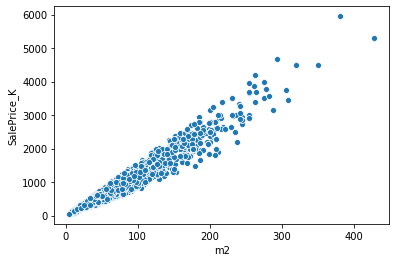

In [40]:
sns.scatterplot(x=df13.m2,y=df13.SalePrice_K,data=df13)

Another way to remove outliers is to check if there is not any incoherence in the number of rooms,bedrooms and bathrooms. Let's check it.

In [41]:
df13[df13.nb_rooms<df13.nb_bedrooms]

,m2,nb_rooms,nb_bedrooms,building_floor,apartment_floor,nb_bath,Cellar,balc_patio,Heating,Renovated,Parking,SalePrice,building_height,Ground_floor,Heating_Central,Heating_Individual,Last_floor,district,SalePrice_K
710,45,1,2,6,2,0,1,0,Unknown,0,0,575000,Average,0,0,0,0,6e,575.0
1334,16,1,2,7,7,0,0,0,électrique,0,0,235000,Average,0,0,0,1,5e,235.0
1581,95,2,3,0,1,1,0,0,Unknown,0,0,1184000,Average,0,0,0,0,10e,1184.0
1584,50,1,2,6,5,0,1,0,Unknown,0,0,520000,Average,0,0,0,0,15e,520.0
2027,189,3,4,6,3,0,1,0,Unknown,0,0,2410000,Average,0,0,0,0,17e,2410.0
2759,69,3,4,0,3,0,0,0,Unknown,0,0,792000,Average,0,0,0,0,13e,792.0
2984,94,2,4,0,6,0,0,0,Unknown,0,0,875000,Average,0,0,0,0,15e,875.0
3094,84,4,5,0,27,1,1,0,Au gaz,1,1,820000,Average,0,0,0,0,19e,820.0
3109,120,2,3,6,2,2,0,Terrasse,"Central, électrique",0,1,1908000,Average,0,1,0,0,6e,1908.0
3116,86,1,3,12,0,1,1,Balcon,Central,0,0,790000,High,1,1,0,0,11e,790.0


In [42]:
#More bedrooms than rooms. Seems incoherent. I will condiser this kind of apartments as outliers. 
#Therefore I can safely delete them.
df14=df13[~(df13.nb_rooms<df13.nb_bedrooms)]


In [43]:
df14[(df14.nb_bedrooms<df14.nb_bath)&(df14.nb_bedrooms!=0)]

,m2,nb_rooms,nb_bedrooms,building_floor,apartment_floor,nb_bath,Cellar,balc_patio,Heating,Renovated,Parking,SalePrice,building_height,Ground_floor,Heating_Central,Heating_Individual,Last_floor,district,SalePrice_K
1534,77,3,1,6,2,2,0,0,"Individuel, au gaz",0,0,1100000,Average,0,0,1,0,1e,1100.0


In [44]:
# 3 rooms, 1 bedrooms and 2 bathrooms. Seems incoherent. We can safely delete this row.
df15=df14[~((df14.nb_bedrooms<df14.nb_bath)&(df14.nb_bedrooms!=0))].drop('SalePrice',axis=1)

# Exploring the colinearity between the different features

We will use the method corr() to give us a hint of any linear relationship between features. A value close to 1 shows a strong positive correlation, and a value close to -1 means a strong negative correlation.

Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.

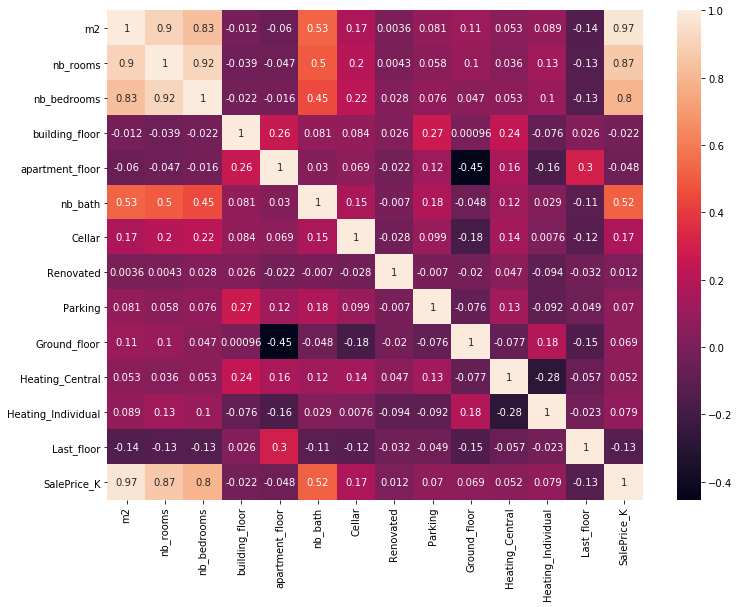

In [206]:
plt.figure(figsize=(12,9))
sns.heatmap(df15.corr(), annot=True)

- It seems that I was right, the SalePrice is strongly positively correlated with the area, the number of rooms,bedrooms and baths.
- The correlation between the number of bedrooms and the number of rooms is so strong that it can indicate a situation of multicollinearity. The number of bedrooms and the number of rooms can be linearly predicted from each others with a high degree of accuracy. 
- The correlation between the number of bedrooms and the number of rooms is strong. May be, we just need one of these variables in our analysis. Thus we will try to only keep the number of rooms and check if it improves the model performance.
- Also, the area feature and the number of rooms is highly correlated. But, I will not drop one of them.
- In our model building we will use Linear Regression models. They are very sensible to multicollinearity, therefore we should fix it. We will also use also use decision trees and boosted trees, but they are immune to multicollinearity. 


## Scatter plots between 'SalePrice' and correlated variables

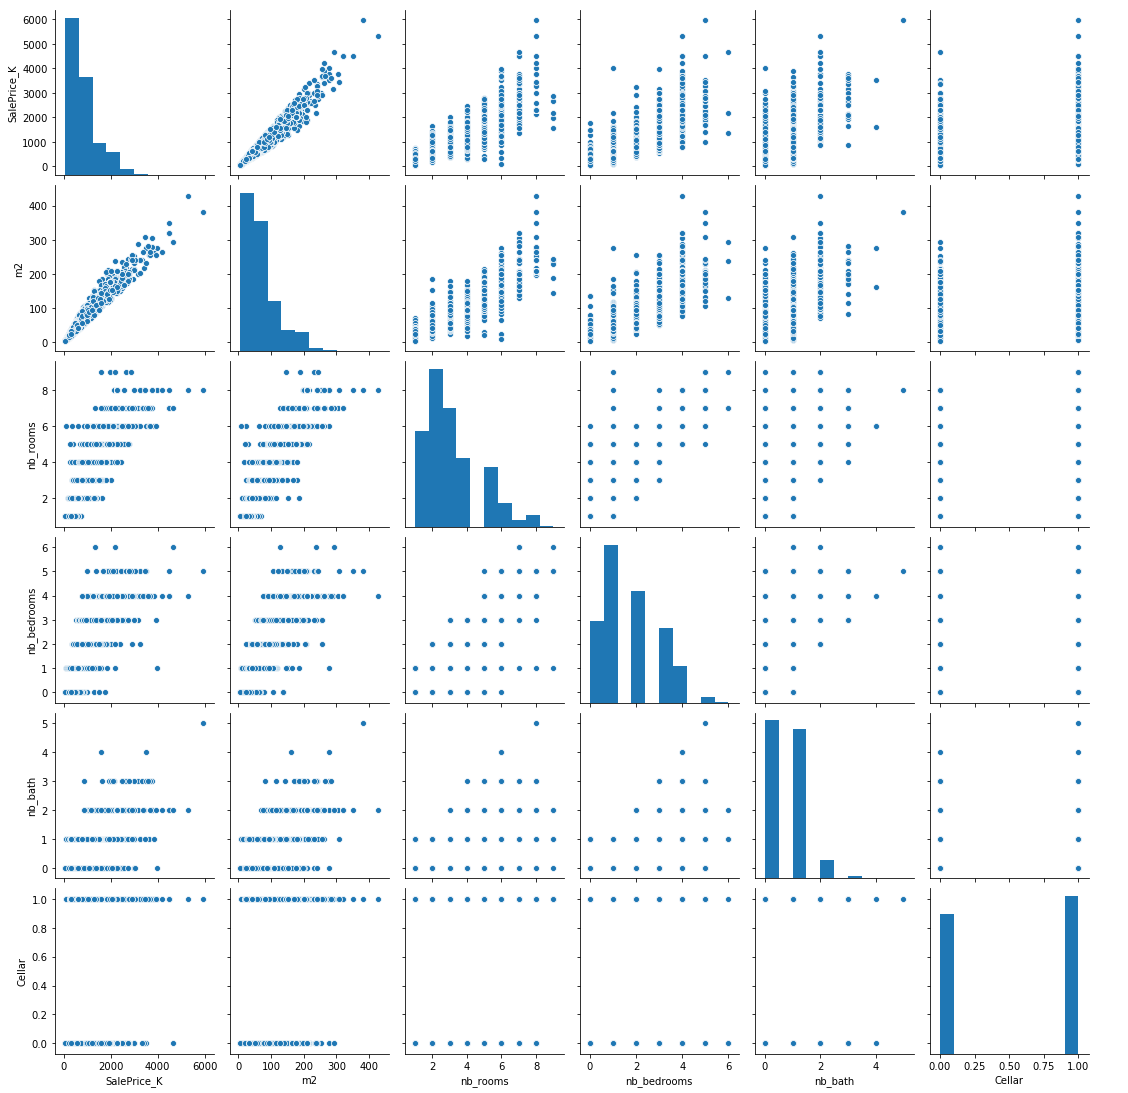

In [207]:
cols = ['SalePrice_K', 'm2', 'nb_rooms', 'nb_bedrooms', 'nb_bath', 'Cellar']
sns.pairplot(df15[cols])
plt.show();

## Exploratory Data analysis of the categorical features

Looking at the correlation matrix, we found that the Renovated feature was slightly correlated with SalePrice. I will first have a look at this categorical feature. 

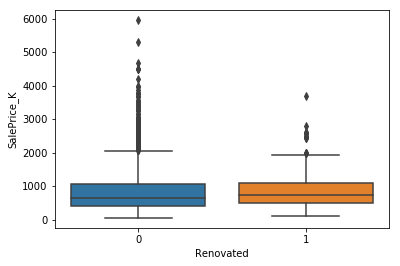

In [208]:
sns.boxplot(x='Renovated',y='SalePrice_K',data=df15)


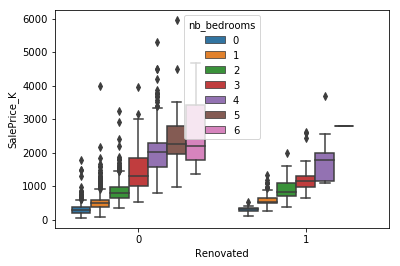

In [209]:
sns.boxplot(x='Renovated',y='SalePrice_K',data=df15, hue='nb_bedrooms')

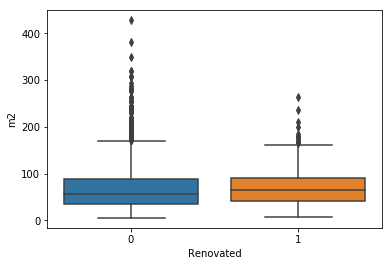

In [210]:
sns.boxplot(x='Renovated',y='m2',data=df15)

Looking at these 3 graphs, it is difficult to assess wether or not Renovation has a real impact on the SalePrice of an apartment in Paris. I know this is weird to make this conclusion but this is what our data says. I think we do not hjave enough apartments which were Renovated to make a clear conclusion about that.

### Number of occurences for each categorical features

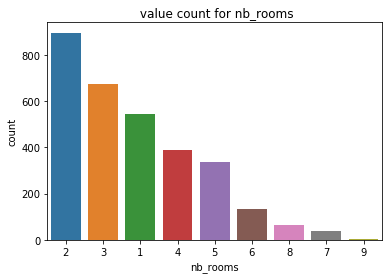

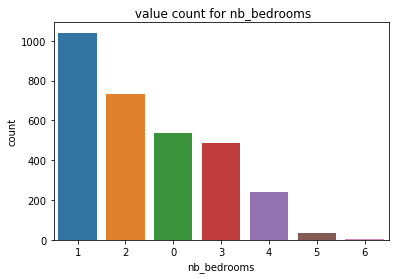

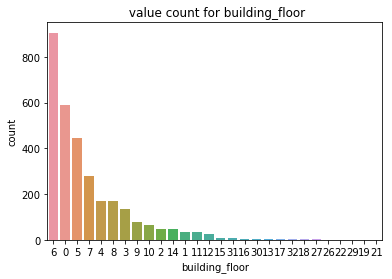

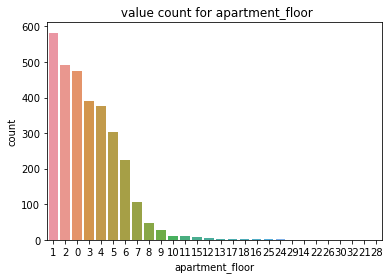

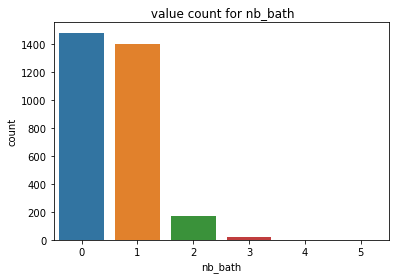

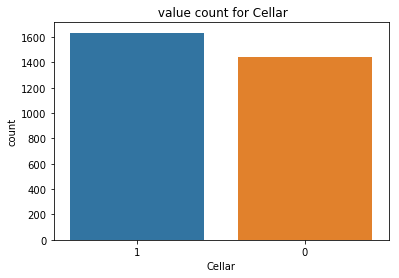

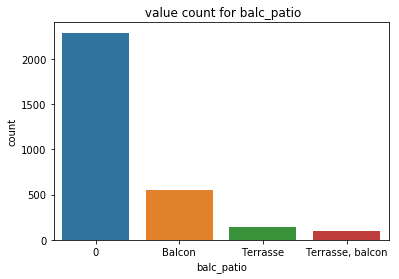

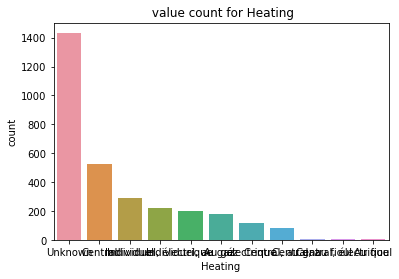

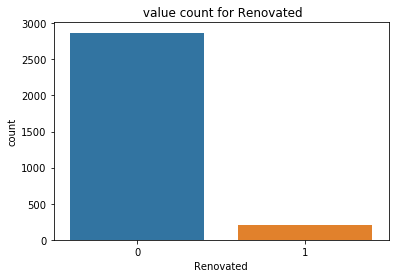

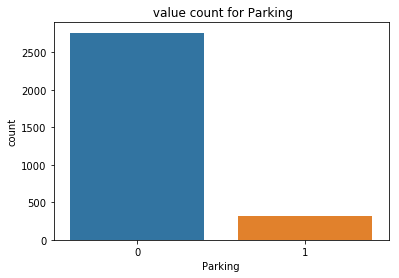

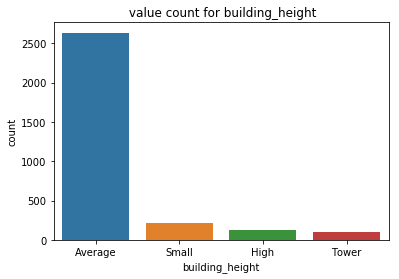

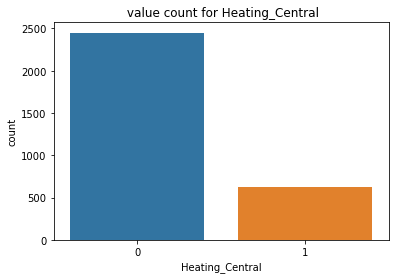

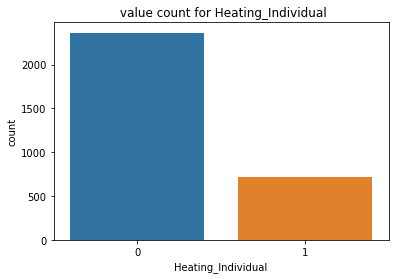

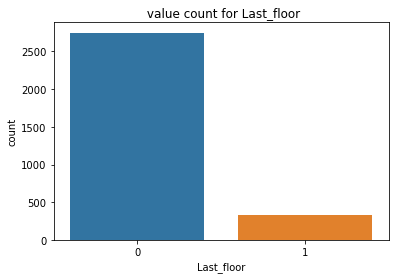

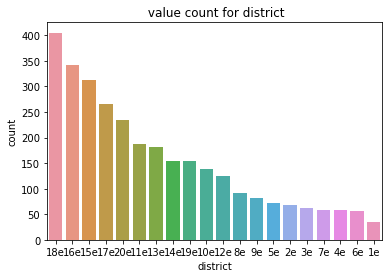

In [211]:
for i in cat:
    plt.title(f' value count for {i}')
    sns.countplot(x=i,data=df15,order=df15[i].value_counts().index)
    plt.show()

- for the number of rooms: The higher the number of rooms the less number of apartments at sale. Seems normal since the average surface for an apartment in Paris is 46 m².
- for the number of bedrooms: Same thing as the number of rooms.
- for the number of floors of the building: mostly the number of floor of the building in Paris is between 9 and 3.
- for the number of bathrooms: a lot of announces that do not specify the number of bathrooms. May be we should have a look at it.
- for the number of apartments sold in each locations: districts with the more apartment availables are 16,15,18,20,17. And the districts with less apartments available are: the 1, 2,5,9,3,4,7.
- for the number of apartments which were renovated: a very small fraction of the apartments were renovated recently.
- Regarding the number of apartment with a Parking, less than 20% of apartments in Paris have a Parking.



### Exploring the feature nb_bath to determine why the number of bathrooms was not specified in a lot of cases.

In [212]:
df15[df15.nb_bath==0]

,m2,nb_rooms,nb_bedrooms,building_floor,apartment_floor,nb_bath,Cellar,balc_patio,Heating,Renovated,Parking,building_height,Ground_floor,Heating_Central,Heating_Individual,Last_floor,district,SalePrice_K
4,32,1,0,9,8,0,1,0,Au gaz,0,0,Average,0,0,0,0,15e,375.0
6,18,1,0,6,0,0,0,0,Unknown,0,0,Average,1,0,0,0,11e,199.0
7,29,1,0,5,4,0,0,0,Unknown,0,1,Average,0,0,0,0,20e,346.5
9,28,1,0,6,1,0,0,0,électrique,1,0,Average,0,0,0,0,15e,355.0
16,25,2,1,6,3,0,0,0,Unknown,0,0,Average,0,0,0,0,2e,385.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3853,25,1,0,12,8,0,1,Balcon,Central,0,0,High,0,1,0,0,20e,312.0
3856,152,5,3,6,5,0,1,Balcon,Individuel,0,1,Average,0,0,1,0,16e,2060.0
3857,50,2,1,0,4,0,0,Balcon,Unknown,0,0,Average,0,0,0,0,13e,576.0
3861,88,3,1,8,0,0,0,Balcon,Unknown,1,1,Average,1,0,0,0,18e,1095.0


After looking at logic_immo website, these apartments have a bathrooms, it was just not specified in their caracteristics. Therefore let's put a 1 instead of a 0.


In [213]:
df15.nb_bath=df15.nb_bath.apply(lambda x: 1 if x==0 else x)

In [214]:
df15.nb_bath.value_counts()

1    2886
2     172
3      19
4       2
5       1
Name: nb_bath, dtype: int64

## Exploring the relationship between SalePrice and the floor of the apartment.

I am wondering about the relationship between the Feature Last Floor and SalePrice. I still believe that apartments at the last floor are way more expensive due to the view and others factors. Let us explore it.

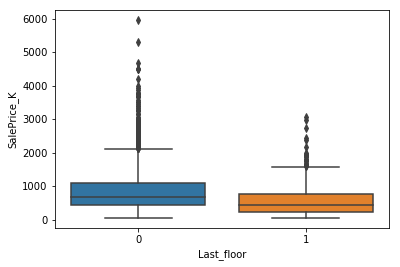

In [215]:
sns.boxplot(x='Last_floor',y='SalePrice_K',data=df15)

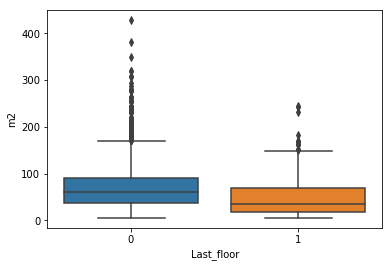

In [216]:
sns.boxplot(x='Last_floor',y='m2',data=df15)

In [217]:
pd.pivot_table(df15,index=['Last_floor','nb_rooms'],values='SalePrice_K',).sort_values('SalePrice_K')

SalePrice_K
Last_floor nb_rooms             
1          1          205.913360
0          1          311.699100
1          2          466.644565
0          2          499.361978
           3          777.221259
1          3          821.330784
           4         1023.571429
0          4         1062.284867
1          5         1357.083333
0          5         1580.951146
1          6         1782.437500
0          6         2106.421675
1          7         2158.333333
0          9         2246.540000
           8         2603.215385
           7         2756.902778

On average this is not the case. I grouped by Rooms in the pivot table to avoid that "Chambre de bonne" affect to much the price of last floor apartments, since there are usually at the last floor of a building.
I do not understand why it seems that on average apartments on the last floor are less expensive. I will have a look at it on the Internet and try to understand this.

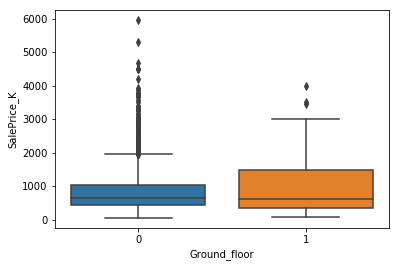

In [218]:
# Let us check if apartments at the Ground Floor are less expensive.
sns.boxplot(x='Ground_floor',y='SalePrice_K',data=df15)

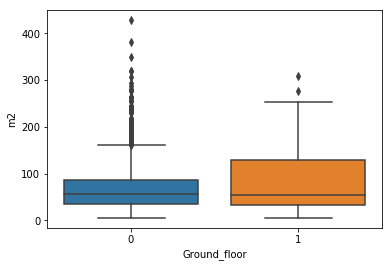

In [219]:
sns.boxplot(x='Ground_floor',y='m2',data=df15)

In [220]:
pd.pivot_table(df15,index=['Ground_floor','nb_rooms'],values='SalePrice_K',).sort_values('SalePrice_K')

SalePrice_K
Ground_floor nb_rooms             
1            1          282.180492
0            1          288.049861
1            2          417.445747
0            2          515.500174
1            3          767.503507
0            3          782.015764
             4         1058.851853
1            4         1076.867724
0            5         1520.730792
1            9         1575.000000
             5         1725.958904
             6         2003.923077
0            6         2074.327800
1            8         2357.358491
0            9         2414.425000
             7         2690.092105
1            7         3500.000000
0            8         3689.083333

Here, this is the case. Looking at the pivot table it is clearly the case that on average apartments at the Ground floor are less expensive. This is what I thought.

### Relationship between the price and the different categorical features

In [221]:
for i in cat:
    print(i)
    print(pd.pivot_table(df15,index=i,values='SalePrice_K',).sort_values('SalePrice_K'))
    print('\n')

nb_rooms
          SalePrice_K
nb_rooms             
1          287.391715
2          495.998847
3          780.568857
4         1060.194938
5         1565.055207
6         2067.446135
9         2246.540000
8         2603.215385
7         2710.858974


nb_bedrooms
             SalePrice_K
nb_bedrooms             
0             307.428062
1             529.533385
2             857.831532
3            1415.284431
4            2039.346017
5            2501.048571
6            2735.833333


building_floor
                SalePrice_K
building_floor             
14               362.302174
31               491.714286
22               500.000000
27               552.250000
17               582.000000
18               694.907000
30               705.508333
5                722.455527
15               722.600000
32               735.100000
16               735.583333
21               749.000000
4                794.822819
0                797.942161
10               825.877273
2                

Looking at those pivot_tables, we can add to our analysis that:
    - The presence of a Cellar and a Parking has an important impact on the Price.
    - This is also the case for balcony and patio which make the price increase.
    - It seems that the new feature that I created "building height" is a great predictor of the SalePrice of an apartment in Paris. Apartments in small buildings are way more expensive than apartments in Higher Buildings. We will now have a look at where the different kind of building height are located in Paris

In [222]:
pd.pivot_table(df15,index='district',columns='building_height',values='SalePrice_K',aggfunc=pd.Series.nunique)

building_height,Average,High,Small,Tower
district,,,,
10e,97.0,NaN,7.0,1.0
11e,128.0,8.0,12.0,1.0
12e,88.0,5.0,7.0,NaN
13e,95.0,27.0,6.0,30.0
14e,104.0,7.0,12.0,5.0
15e,199.0,23.0,20.0,7.0
16e,223.0,19.0,10.0,NaN
17e,172.0,4.0,14.0,2.0
18e,187.0,2.0,22.0,3.0


Towers are situated in the less expensive districts of Paris. In the center of Paris there is no towers buildings but only small and average ones. It seems that in Paris the height of buildings is segemented by districts.

### Normalization and Scaling

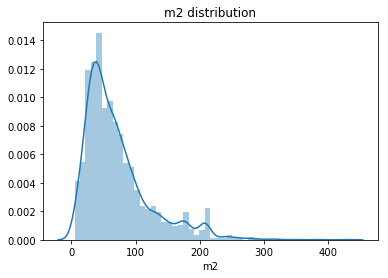

Skewness: 1.666001586097544
Kurtosis: 3.5361020859544285


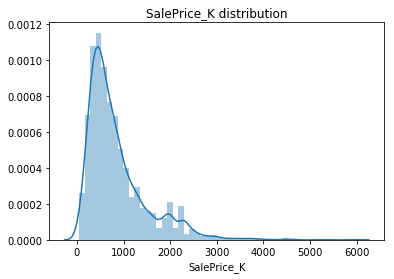

Skewness: 1.902655380616025
Kurtosis: 5.231171373961303


In [223]:
for i in num:
    sns.distplot(df15[i])
    plt.title(f'{i} distribution')
    plt.show()
    print(f"Skewness: {df15[i].skew()}")
    print(f"Kurtosis: {df15[i].kurt()}")

In [224]:
#We will use the log transformation on the SalePrice and the area feature.
df15.SalePrice_K=np.log(df15.SalePrice_K)
df15.m2=np.log(df15.m2)

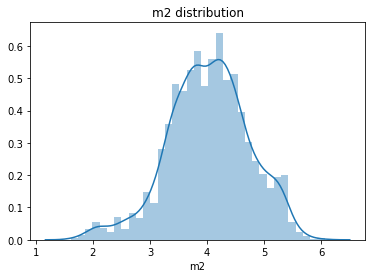

Skewness: -0.2691928089276769
Kurtosis: 0.20399881116837548


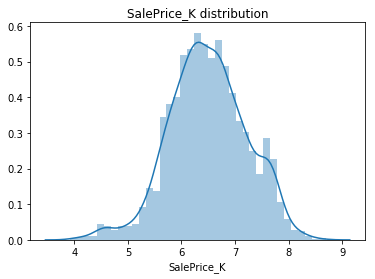

Skewness: -0.13473900665188931
Kurtosis: 0.12461775859653512


In [225]:
for i in num:
    sns.distplot(df15[i])
    plt.title(f'{i} distribution')
    plt.show()
    print(f"Skewness: {df15[i].skew()}")
    print(f"Kurtosis: {df15[i].kurt()}")

In [228]:
df15.to_csv('final_data_Copy.csv',index=False)

These kind of small apartments are usually called "Chambre de Bonne" and are usually at the last floor of a building. But these kinds of apartments are rare in Paris and therefore I think the best solution is to consider them as outliers.

# SHOULD I REMOVE CHAMBRE DE BONNE ON VA CHECK